## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df= pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]


294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()


290584

d. The proportion of users converted.

In [6]:
df[df['converted']==1]['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [36]:
df.query('group == "treatment" & landing_page != "new_page"').count()
#df.groupby('group' == 'treatment').count() #group == 'treatment' and landing_page != 'new_page

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [37]:
df.query('group == "control" & landing_page == "new_page"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [39]:
1965+1928

3893

1965 is the number of times new_page and treatment dont line up.
The total number of times a group was given the wrong page was 3893  


f. Do any of the rows have missing values?

In [21]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [22]:
index= df[(df['group']=='treatment') & (df['landing_page']=='old_page') | (df['group']=='control') & (df['landing_page']=='new_page')].index
df2= df.drop(index)

In [23]:

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
# the amount of unique user ids  
df2.user_id.nunique ()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [25]:
# The row which is duplicated 
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [26]:
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [27]:
#check for duplicates
df2=df2.drop_duplicates('user_id', keep ='first')
df2[df2['user_id'].duplicated()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [28]:
#df2['converted'].mean()
total=len(df2)
convertedtotal= len(df2.query('converted== "1"'))
convertedtotal/total

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [29]:
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [30]:
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [31]:
New_page= len(df2.query('landing_page=="new_page"'))
New_page/total

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

There is not suffiecent evidence to supports that landing on a new page leads to more users being converted. The probablities of a converstion taking place are almost the same for both pages, which is around 12% therefore the new page isn't having much of an effect on conversions compared to old page. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis: **$p_{new}$** - **$p_{old}$** <= 0

Alterneative hypothesis: **$p_{new}$** - **$p_{old}$** > 0

The converted rates for old page will be equal to or greater then the converted rates of the new page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [192]:
P_null=df2['converted'].mean()
P_null

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [193]:
df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$?

In [194]:
New_page

145310

d. What is $n_{old}$?

In [195]:
Old_page=len (df2.query('landing_page=="old_page"'))
Old_page

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [196]:
new_page_converted= np.random.choice([1,0], size= New_page, p=[P_null,1-P_null])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [197]:
old_page_converted = np.random.choice([1,0], size= Old_page, p=[P_null, 1- P_null])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [198]:
new_page_converted.sum()/len(new_page_converted) - old_page_converted.sum()/len(old_page_converted) 

0.0003214725516502981

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [199]:
# simulate the ramdon values numbered 10000
p_diffs=[]
for _ in range(10000):
    new_page_converted= np.random.choice([1,0], size= New_page, p=[P_null,1-P_null]) 
    old_page_converted = np.random.choice([1,0], size= Old_page, p=[P_null, 1- P_null])
    p_diffs.append(new_page_converted.sum()/len(new_page_converted) - old_page_converted.sum()/len(old_page_converted))  

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   6.,   62.,  362., 1270., 2486., 2851., 1976.,  794.,  169.,
          24.]),
 array([-0.00482037, -0.00391179, -0.00300322, -0.00209465, -0.00118608,
        -0.00027751,  0.00063107,  0.00153964,  0.00244821,  0.00335678,
         0.00426535]),
 <a list of 10 Patch objects>)

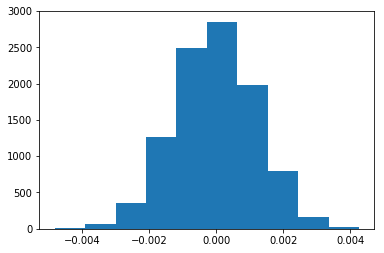

In [200]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [201]:
obs_diffs = df2.query('landing_page== "new_page"').converted.mean() - df2.query('landing_page== "old_page"').converted.mean()
obs_diffs

-0.0015782389853555567

In [202]:
# work out the p-value 
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
(null_vals > obs_diffs).mean()

0.9101

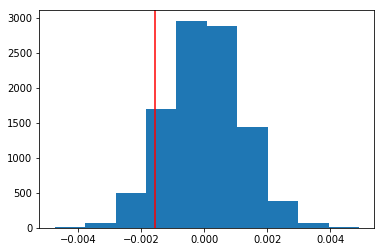

In [203]:
plt.hist(null_vals)
plt.axvline(x=obs_diffs,color ='red')

In [204]:
np.percentile(p_diffs,2.5),np.percentile(p_diffs,97.5)

(-0.0023977053365521776, 0.002317376945647798)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The P values is 0.9 which is greater than 0.05 therefore we can not reject the null hypothesis and there is no  conclusive difference between old pager and new page.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
#Import the stats model 
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]
print(convert_old,convert_new,n_old,n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
# peform the ztest
z_value, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_value, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score for this part was 1.31 therefore comparing this with the mean for all conversions, the value is with in the 95% confidence interval and therefore we can not reject the null hypothesis. 
With a p-value of 0.0949 which is greater than 0.05 we accept the null hypothesis that the old page is the same as new page. The P-values are close enough that we can accept the previous findings agree with the ztest.  

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

For this section the regrssion model that would fit the bet it the logistic model. As the variable being looked at is catagorical; whether the user has been converted on or not. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [207]:
# Dummy varibles are added here as well as a intercept column
temp = pd.get_dummies(df2['group'])
df2['ab_page']= temp['treatment']

df2['intercept']= 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [208]:
# The medel is imported and fitted to then be summarized 
LREG_M = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = LREG_M.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [209]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        21:04:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [210]:
# exponentiate to interpret them.
np.exp(-1.9888), np.exp(-0.0150)

(0.13685955841614492, 0.9851119396030626)

In [211]:
# Easier to explain as a non negative 
1/np.exp(-1.9889), 1/np.exp(-0.0150)

(7.307491099446569, 1.015113064615719)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value = 0.19

In part 2 we used a hypothesis where old page and new page are equal i.e we were comparing the coversion from each page. In this part we are looking at the effectivness of a page regard less of ifits old or new. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are some other factors which may change wether a conversion happens or not. One of which is the Time stamp column. The time of day or the date may narrow down the best time to get the most converstions. There maybe other factors about the wedsite which are not considered in the data set. Such as what device the site is being viewed on and how the differnt page perform on those devices. Another factor to have a look at might be; how many visits a person makes before they convert, this will help make give an idea how long it takes for most people to be confortable with the change.   

It is a good idea not to narrow down your anaysis to just one or two facters as this will give a small slice of the larger picture. Therefore certain details might be missed and the wrong conclusions drawn. However Looking at too many varibles can also lead to increased chances of errors ocurring or the values are compramised by the increase in varibles. In addition looking at many varibles may lead to multicolinearity i.e. the varibles are dependant on each other as well as the response.   

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [212]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [213]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [214]:
### Fit Your Linear Model And Obtain the Results
con_con = sm.OLS(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results = con_con.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.178
Time:                        21:04:02   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1161      0.003     42.036      0.000       0.111       0.122
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
UK             0.0053      0.003      1.784      0.074      -0.001       0.011
US             0.0042      0.003      1.514      0.130      -0.001       0.010
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
# exponentiate to interpret them.
np.exp(-0.0016), np.exp(0.0053), np.exp(0.0042)

(0.9984012793176064, 1.0053140698457452, 1.0042088323609764)

If the user was from the UK then they are 1.01 times more likely to be converted.

If the user is from the US then they are 1.004 times more likely to be converted. 

So users from the UK are Slightly more likely to convert but the margin is very small. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [216]:
df_new['UK_newpage'] = df_new['UK'] * df_new['ab_page'] 
df_new['US_newpage'] = df_new['US'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,UK_newpage,US_newpage
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [217]:
con_newpage = sm.OLS(df_new['converted'], df_new[['intercept', 'UK', 'US','ab_page', 'UK_newpage', 'US_newpage']])
results2 = con_newpage.fit()
results2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Tue, 28 May 2019   Prob (F-statistic):              0.197
Time:                        21:04:02   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1188      0.004     31.057      0.000       0.111       0.126
UK             0.0012      0.004      0.296      0.767      -0.007       0.009
US             0.0018      0.004      0.467      0.641      -0.006       0.010
ab_page       -0.0069      0.005     -1.277      0.202      -0.017       0.004
UK_newpage     0.0080      0.006      1.360      0.174      -0.004       0.020
US_newpage     0.0047      0.006      0.845      0.398      -0.006       0.016
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# exponentiate to interpret them.
np.exp(-0.0069), np.exp(0.0080), np.exp(0.0047)

(0.9931237503428162, 1.0080320855042735, 1.0047110623241844)

In terms of wether the country of the users origin has a effect if they prefer the old page or the new page? Its is clear from all the p=values for this question that there is not much of a influence from any country on conversion. 

<a id='conclusions'></a>
## Conclusions
A/B testing is often used to determine if changes to a website are effective in our can we were looking at a new page and a old page. 

In part 2 we were testing wether or not the old and new page had an equal rate of conversion and we found that this was true. We then found the z value whcih also supported the null hypothesis. 

In part 3 we used the logistic regression model and found that the old and new page had an effect on conversion. However the country a user was from did not effect the rate of conversion. 



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.